In [4]:
imagesDir = '/media/sf_hellmersjl/bitbucket/hellmers_ms/thesis_doc/Figures'

In [25]:
def RochePotential(x, y, z, m1, m2, a):
    import math
    import numpy as np
    
    G = 6.67408e-11
    m = m2/(m1+m2)
    #m = m1+m2
    rtol = 0.1
    
    
    r1 = np.sqrt(x**2 + y**2)
    if (r1 < rtol):
        r1 = rtol

    #r2 = np.sqrt((x-a)**2 + y**2)
    r2 = np.sqrt((x-1.0)**2 + y**2)
    if (r2 < rtol):
        r2 = rtol
        
    Omega = np.sqrt(G*m/(a**3))
    
    pot = - G*m1/r1 - G*m2/r2 - (1.0/2.0)*(Omega**2)*((x-m)**2 + y**2)
    return pot

In [7]:
print(RochePotential(0.0, 0.0, 0.0, 1.0, 2.0, 3.0))

-7.452722666666666e-10


29919.574139999997


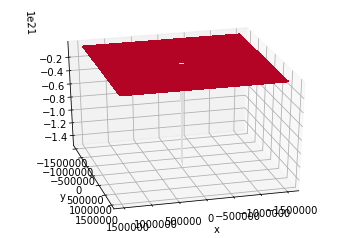

In [26]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np
from matplotlib.pyplot import figure

m1 = 1.98847e30
m2 = 1.5*m1

a = 1.495978707e11
multspace = 100000.0
x1 = -a/multspace
x2 = a/multspace
y1 = -a/multspace
y2 = a/multspace

fig = plt.figure()
ax = fig.gca(projection='3d')
print((x2-x1)/100.0)
# Make data.
X = np.arange(x1, x2, (x2-x1)/100.0)
Y = np.arange(y1, y2 ,(y2-y1)/100.0)

Xmesh, Ymesh = np.meshgrid(X, Y)
R = np.sqrt(Xmesh**2 + Ymesh**2)
Z = np.sin(R)
    
i = 0
for y in np.nditer(Y):
    j = 0
    for x in np.nditer(X):
        Z[i,j] = RochePotential(x, y, 0.0, m1, m2, a)
        j = j + 1
    i = i + 1

surf = ax.plot_surface(Xmesh, Ymesh, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

#ax.set_title("Roche Potential")
plt.xlabel("x")
plt.ylabel("y")
# Add a color bar which maps values to colors.
#fig.colorbar(surf, shrink=0.5, aspect=5)
#figure(num=None, figsize=(16, 16), dpi=180, facecolor='w', edgecolor='k')


ax.view_init(azim=75,elev=30)

#plt.show()
plt.savefig(imagesDir + '/' + 'RochePotential.eps')